### Imports

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize

# Pre-processing

In [2]:
 #### Takes around 5-10 minutes to load all the data. ####
# OSM data: 
landuse = gpd.read_file("Data/Data_OSM/gis_osm_landuse_a_free_1.shp")
water = gpd.read_file("Data/Data_OSM/gis_osm_water_a_free_1.shp")
waterways = gpd.read_file("Data/Data_OSM/gis_osm_waterways_free_1.shp")
# Soil data:
soil_data = gpd.read_file("Data/soil/Jordart_200000_shape/Jordart_200000.shp")
kyst_jordard = gpd.read_file("Data/Soil/Jordart_200000_shape/Kyst_Jordart_200000.shp")
# Regional boundaries on 1st, 2nd and 3rd level (Country, region, municipality): 
regions = gpd.read_file("Data/administrative_units/DK_administrativeUnit/au_inspire.gpkg")

c:\Users\steni\anaconda3\envs\Geospatial_DS_env\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
c:\Users\steni\anaconda3\envs\Geospatial_DS_env\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [3]:
#takes 5 minutes to run
full_df = gpd.read_file("saved_shp_files/forest_soil_regions/forest_soil_regions.shp")

In [4]:
# rename the soil abbreviations to their full descriptions
soil_data['TSYM'] = soil_data['TSYM'].replace({'ES': 'flyvesand', 'F': 'ferskvandsdannelser', "HV": "Marskaflejringer",
                                                "HSL" : "Marint sand og ler", "HG" : "Strandvolde", "MSG" : "Morænesand og -grus",
                                                "ML": "Moræneler", "DSG": "Smeltevandssand og grus", "DL" : "Smeltevandsler",
                                                "T" : "Ekstramarginale aflejringer", "Y": "Ældre havaflejringer", 
                                                "AF": "Arnagerkalk med fosforit konglomerat",
                                                "BS": "Grønsand", "CV": "Vekslende lag af ler og sand",
                                                "ED": "Eocænt moler med vulkanske askelag","EQ": "Nexø sandsten",
                                                "GC": "Miocænt sand med vekslende lag af brunkul og ler",
                                                "GL": "Udifferentieret glimmerholdigt tertiært ler",
                                                "GNG": "Den Bornholmske grå gnejs",
                                                "GS": "Udifferentieret tertiært glimmersand",
                                                "HAG": "Hammer granit",
                                                "JV": "Vekslende lag af kul, ler og sand",
                                                "KA": "Kaolin",
                                                "KQ": "Balka sandsten",
                                                "KS": "Kvartssand stedvis med indslag af glimmerler",
                                                "LL": "Eocænt plastisk ler",
                                                "OL": "Oligocænt glimmerholdigt ler",
                                                "PAM": "Paradisbakke migmatit","PL": "Paleocænt plastisk ler og mergel",
                                                "RG": "Robbedalegrus","ROG": "Rønne granit",
                                                "SK": "Skrivekridt med flint","SVG": "Svaneke granit",
                                                "VAG": "Vang granit",
                                                "ZK": "Danienkalk med flint" })

### Unify CRS coordinates

In [5]:
water.to_crs(soil_data.crs, inplace=True)
waterways.to_crs(soil_data.crs, inplace=True)
landuse.to_crs(soil_data.crs, inplace=True)

----

### Generating the datasets

Only run this code if you do not have the final data - it takes roughly 15 hours to generate all the neccesary dataframes on a relatively strong computer

In [6]:
# Perform overlay operation
#overlay = gpd.overlay(landuse, soil_data, how='intersection')
#Denmark = Denmark.merge(overlay[['geometry', 'TSYM']], on='geometry', how='left')
#Denmark.rename(columns={'TSYM': 'soil_type'}, inplace=True)

In [7]:
#full_dataframe = gpd.overlay(overlay, regions, how='intersection')

In [8]:
#takes around 1 hour to run
#water_regions = gpd.overlay(water, regions, how='intersection')
#water_regions_.to_file("saved_shp_files/water_regions/water_regions.shp")
#waterways_ = waterways.copy()

In [9]:
##takes 40 minutes to run
#waterways_regions = gpd.overlay(waterways_, regions, how='intersection')
#waterways_regions.to_file("saved_shp_files/water_regions/waterways_regions.shp")
#waterways_ = waterways_regions.copy()

In [10]:
# #drop columns 
# water_regions_ = water_regions.drop(columns=["beginlifespanversion","inspireid", 
#                                              "endlifespanversion", "name_gn_nativeness","name_gn_language",
#                                                "name_gn_namestatus","name_gn_sourceofname", "name_gn_pronunciation",
#                                                "name_gn_spell_spellofna_script", "residenceofauthority", "upperlevelunit"])

-----

### cleaning and readying the last dataset (needs to be ran before executing the rest of the code)

In [11]:
#read the files
#This is required to do when running the code, as the different geometries cant be saved to a file
water_regions = gpd.read_file("saved_shp_files/water_regions/water_regions.shp")
waterways_regions = gpd.read_file("saved_shp_files/water_regions/waterways_regions.shp")

# rename the collumns so that they are similar
water_regions.rename(columns = {"nationalco" : "nationalcode", "nationalle": "nationallevel", "national_1": "nationallevelname",
                                "region_nam" : "region_name" }, inplace = True)
waterways_regions.rename(columns = {"nationalco" : "nationalcode", "nationalle": "nationallevel", "national_1": "nationallevelname",
                                "name_gn_sp" : "region_name" }, inplace = True)
full_df.rename(columns = {"nationalco" : "nationalcode", "nationalle": "nationallevel",
                          "name_gn_sp" : "region_name" }, inplace = True)
#combine the dataframes
water_regions_full = pd.concat([water_regions, waterways_regions])

full_df = pd.concat([full_df, water_regions_full ])
full_df.head(1)

,osm_id,code,fclass,name,TSYM,Type,Area_km2,nationalcode,nationallevel,country,region_name,boundary,geometry,nationallevelname,width
0,3098756,7202,park,Ørstedsparken,ML,Moræneler,0.064412,DK,1stOrder,DK,Danmark,id0b4a275a-95de-4e7b-bf73-2d11fa3dfd6c,"POLYGON ((724076.178 6176264.527, 724077.876 6...",NaN,NaN


-----

# Visualization and Analysis

In [12]:
# # this cell takes around 20 min to run 
# # Calculate the total area of Denmark
# denmark_area = regions[regions["nationallevel"] == "1stOrder"].geometry.unary_union.area

# # Calculate the area of each class in the forest_data
# class_areas = full_df.groupby('fclass').geometry.apply(lambda x: x.unary_union.area)

# # Calculate the percentage area of each class
# percentage_areas = (class_areas / denmark_area) * 100

# # Print the percentage area of each class
# print(percentage_areas)

Soil composition and forests viz

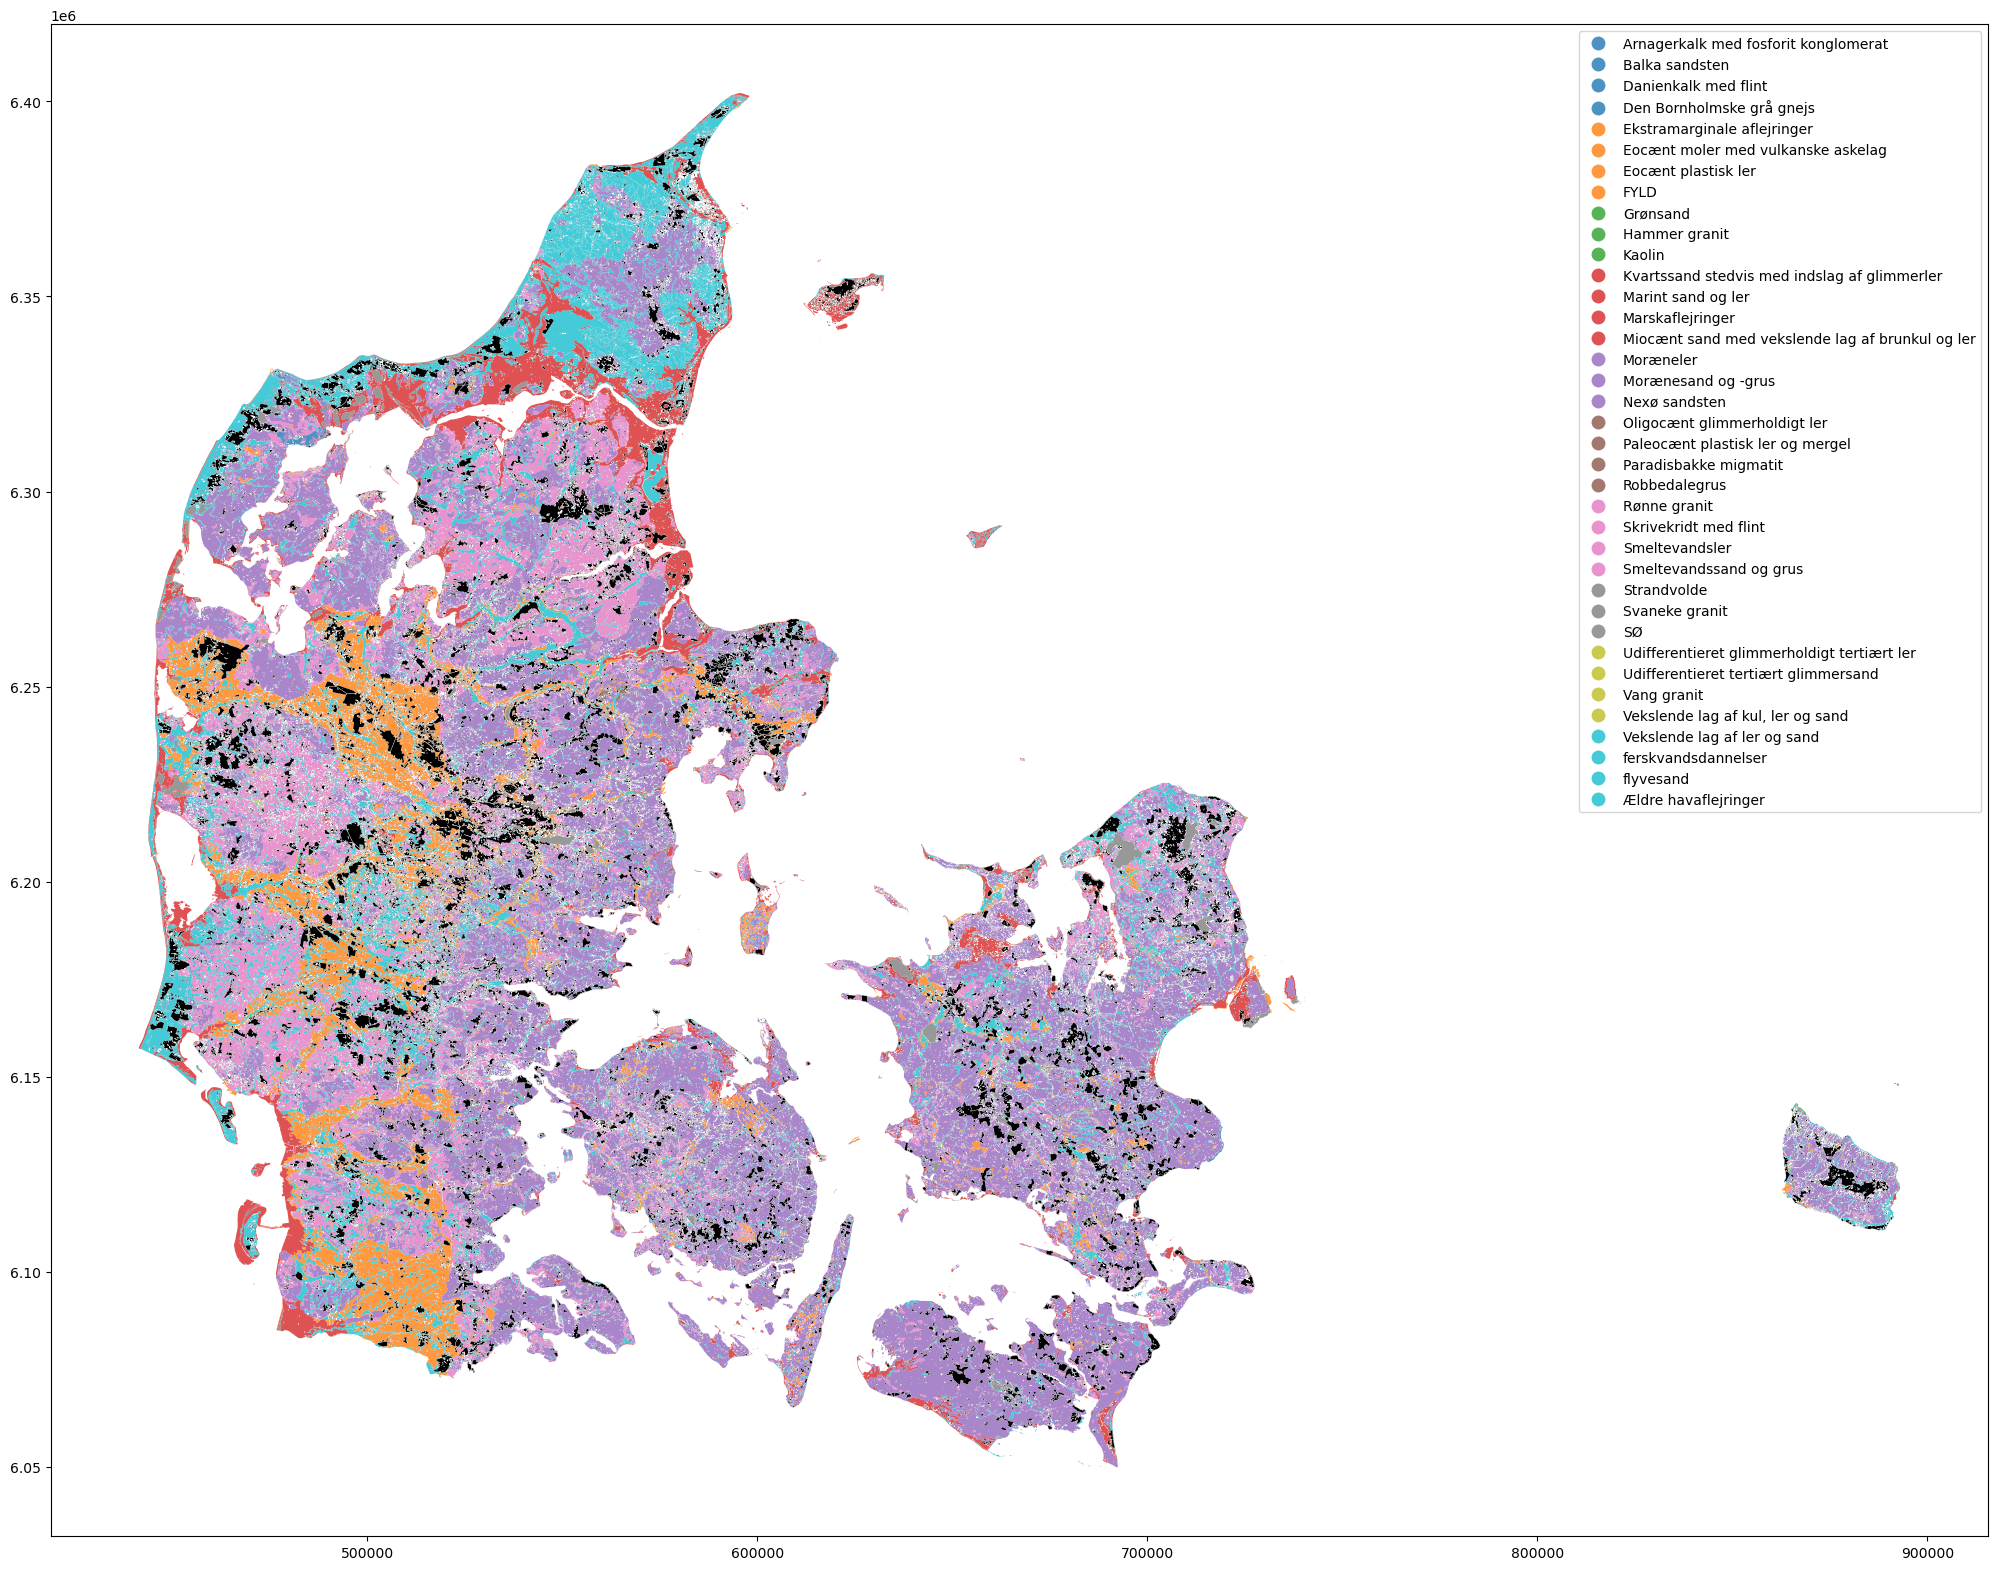

In [13]:
fig, ax = plt.subplots(figsize=(25, 25))
landuse[landuse['fclass'] == 'forest'].plot(ax=ax, color="black", edgecolor='white', linewidth=0.2, zorder=1)
soil_data.plot(column='TSYM', legend=True, ax=ax, figsize=(10, 10), alpha=0.8, zorder=0)

plt.show()

In [14]:
forest = full_df[full_df["fclass"] == "forest"]
soil_area = forest.groupby("Type").geometry.apply(lambda x: x.unary_union.area)

In [15]:
# Filter Denmark dataframe to only include forest areas
forest_areas = full_df[full_df['fclass'] == 'forest']

# Group the forest_areas dataframe by 'Type' and sum the 'Area_km2' for each group
forest_soil_area = forest_areas[forest_areas["nationallevel"]== "1stOrder"].groupby('Type').sum('Area_km2')

#sort the forest_soil_area dataframe by 'Area_km2'
forest_soil_area = forest_soil_area.sort_values('Area_km2', ascending=False)

#remove the "code" column since it is not needed
forest_soil_area = forest_soil_area.drop(columns="code")
forest_soil_area.drop(columns = "width", inplace = True)

Used area per region

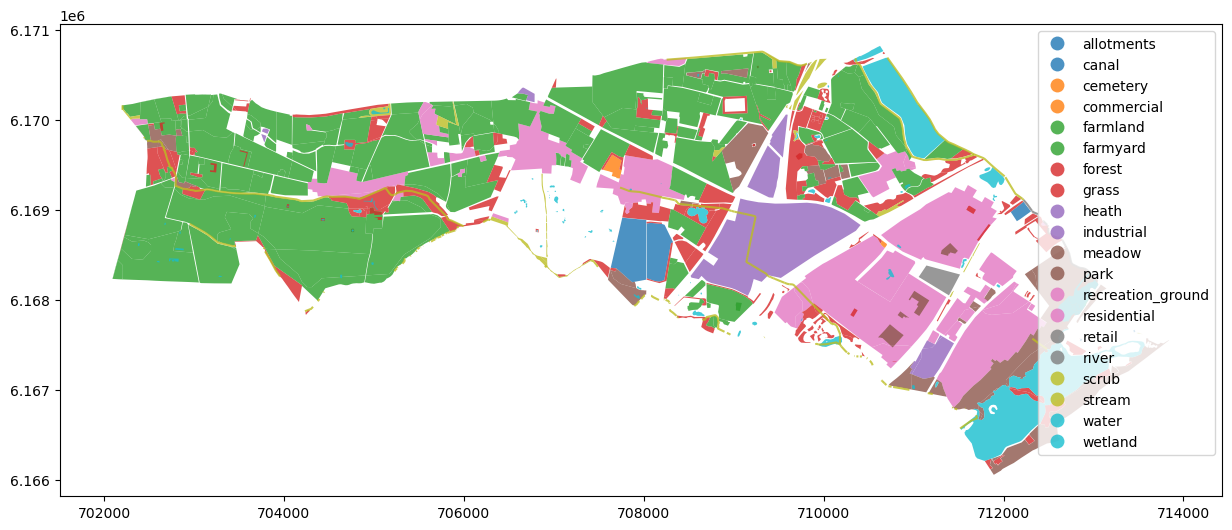

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
#full_df[full_df['name_gn_sp'] == 'Glostrup'].plot(ax=ax, color="black", edgecolor='white', linewidth=0.2, zorder=0)
full_df[full_df["region_name"]== "Ishøj"].plot(column="fclass", legend=True, ax=ax, alpha=0.8, zorder=1)
plt.show()

percentage use per region

In [17]:
 # Calculate the total area of Denmark
region_area = regions.loc[regions["name_gn_spell_spellofna_text"] == "Ishøj"].geometry.unary_union.area

# Calculate the area of each class in the forest_data
class_areas = full_df.loc[full_df["region_name"] == "Ishøj"].groupby('fclass').geometry.apply(lambda x: x.unary_union.area)

# Calculate the percentage area of each class
percentage_areas = (class_areas / region_area) * 100

# Print the percentage area of each class
print(percentage_areas)

fclass
allotments            1.481351
canal                 0.000000
cemetery              0.117241
commercial            0.012118
farmland             33.581369
farmyard              2.344173
forest                6.901818
grass                 0.297799
heath                 0.053444
industrial            5.251053
meadow                1.952087
park                  4.429916
recreation_ground     0.039468
residential          15.324592
retail                0.300755
river                 0.000000
scrub                 0.601803
stream                0.000000
water                 3.806201
wetland               1.703541
Name: geometry, dtype: float64


In [18]:
# calculate the percentage each soil type contributes to the total area
forest_soil_area["percentage"] = (forest_soil_area / forest_soil_area.sum()) * 100
# normalize the percentages to be between -1 and 1
forest_soil_area["normalized"] = normalize(forest_soil_area["percentage"].values.reshape(1,-1), norm='max')[0]
# add the normalized value of each soil type in the full_df dataframe
full_df["soil_norm_usability"] = full_df["Type"].map(forest_soil_area["normalized"])

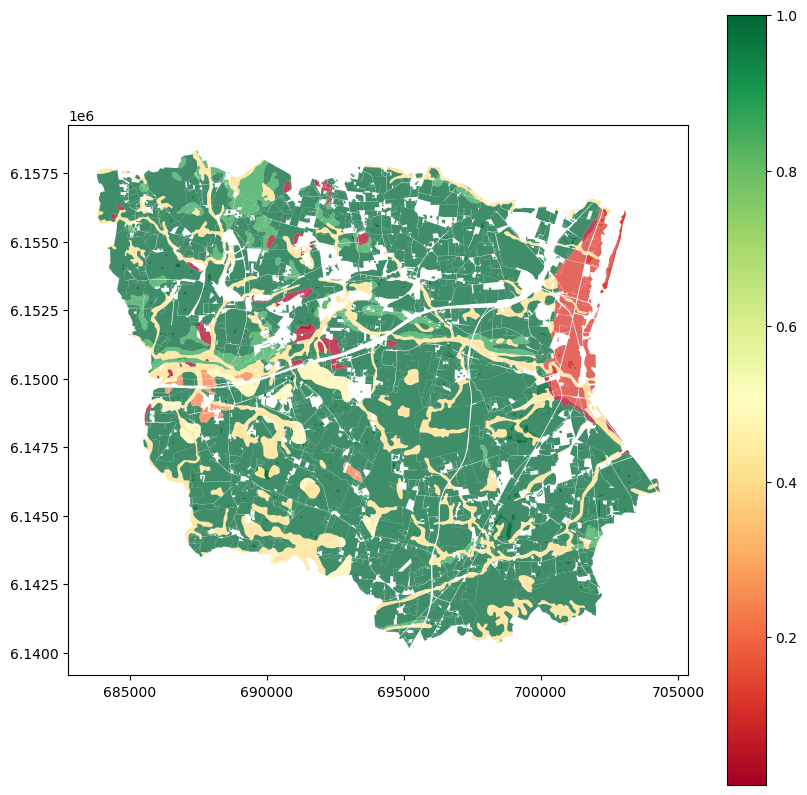

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
full_df[full_df['region_name'] == 'Køge'].plot(column= "soil_norm_usability", cmap = "RdYlGn", ax=ax, linewidth=0.2, alpha = 0.75, zorder=0,legend=True)
#full_df[full_df["region_name"]== "Ishøj"].plot(column="Type", legend=True, ax=ax, alpha=0.8, zorder=0)

plt.show()

In [20]:
full_df.head()

,osm_id,code,fclass,name,TSYM,Type,Area_km2,nationalcode,nationallevel,country,region_name,boundary,geometry,nationallevelname,width,soil_norm_usability
0,3098756,7202,park,Ørstedsparken,ML,Moræneler,0.064412,DK,1stOrder,DK,Danmark,id0b4a275a-95de-4e7b-bf73-2d11fa3dfd6c,"POLYGON ((724076.178 6176264.527, 724077.876 6...",NaN,NaN,1.0
1,3098756,7202,park,Ørstedsparken,ML,Moræneler,0.064412,0101,3rdOrder,DK,København,None,"POLYGON ((724076.178 6176264.527, 724077.876 6...",NaN,NaN,1.0
2,3098756,7202,park,Ørstedsparken,ML,Moræneler,0.064412,1084,2ndOrder,DK,Region Hovedstaden,None,"POLYGON ((724076.178 6176264.527, 724077.876 6...",NaN,NaN,1.0
3,3098803,7202,park,Botanisk Have,ML,Moræneler,0.120049,DK,1stOrder,DK,Danmark,id0b4a275a-95de-4e7b-bf73-2d11fa3dfd6c,"POLYGON ((724441.104 6176889.062, 724438.553 6...",NaN,NaN,1.0
4,3098803,7202,park,Botanisk Have,ML,Moræneler,0.120049,0101,3rdOrder,DK,København,None,"POLYGON ((724441.104 6176889.062, 724438.553 6...",NaN,NaN,1.0
